In [124]:
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# %matplotlib inline


# from sklearn.preprocessing import LabelEncoder

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls


# import glob
# # store paths to all images
# paths = glob.glob('data/simpsons_dataset/*/*')

# from PIL import Image

import pickle as pkl

In [2]:
size_x, size_y = 128,128
# set seed for reproducability
np.random.seed(1996)
# pick 35 random images
sample_paths = np.random.choice(paths, size = 25, replace=False)
# load, resize and store said images in a list
sample_images = [Image.open(pth).resize((size_x, size_y)) for pth in sample_paths]

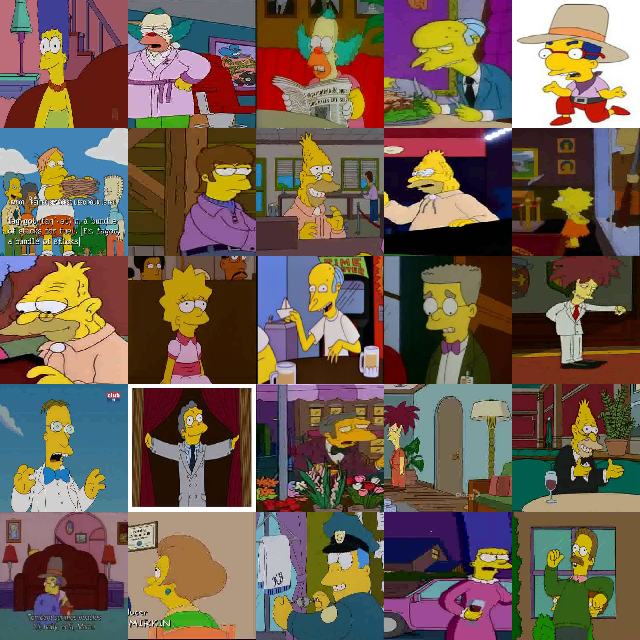

In [3]:
'''
Plot sample of images. 
To do so, past together 5 images at a time to make five rows, 
then paste the five rows together
'''
row1 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[0:5])))
row2 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[5:10])))
row3 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[10:15])))
row4 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[15:20])))
row5 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[20:25])))
# paste these rows together vertically
Image.fromarray(np.vstack((np.asarray(i) for i in [row1,row2,row3,row4,row5])))

---

Build a design matrix, and target vector

In [57]:
'''
Build a design matrix. 

As is, there are 20933, each of which are in (r,g,b) format, and around 500x500 pixels. 
That's a lot of data, and I don't want to sit around forever waiting for my models to train. 

So, as a form of lossy compression, I will:
    1. Convert each image to gray scale
    2. Reshape each image to 128x128 pixels
    
Thus, each image can be represented as a 16,384 vector - which is more tractable.

At the end of this block, we will have:
    X: (numpy.ndarray) input data - each column is a pixel (in order)
    y: (numpy.ndarray) labels - character labels of characters
'''
# set the sizes for the x and y axes of image
x_size, y_size = 128, 128
# create an array to store a list of all characters
all_characters = np.ndarray(shape = (0,))
# create a template for X and y
X = np.ndarray(shape = (0,x_size*y_size))
y = np.ndarray(shape = (0,))

In [58]:
for path in paths:
    # isolate the character's name from the path
    character = path.split('/')[-2]
    # add said character name to the target vector
    all_characters = np.append(all_characters, character)

In [59]:
# look at the number of photos of each character
counts = np.unique(all_characters,return_counts = True)
char_count= sorted(zip(counts[0], counts[1]), key = lambda x: x[1], reverse = True)
char_count

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 ('gil', 27),
 ('miss_hoover'

In [60]:
# keep a list of only the 20 most commonly occuring characters
top_characters = [character[0] for character in char_count[0:20]]
top_characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum',
 'abraham_grampa_simpson',
 'sideshow_bob',
 'apu_nahasapeemapetilon',
 'kent_brockman',
 'comic_book_guy',
 'edna_krabappel',
 'nelson_muntz',
 'lenny_leonard',
 'mayor_quimby']

In [61]:
for path in paths:
    # isolate the character's name from the path
    character = path.split('/')[-2]
    if character in top_characters:
        # Open the current image
        img = Image.open(path)
        # gray scale the image
        img = img.convert("L")
        # reshape the image
        img = img.resize((x_size, y_size))
        # flatten the image into a vector
        img_vect = np.array([list(img.getdata())])
        # add the vector to the design matrix
        X = np.concatenate((X, img_vect))
        # add the label to the target vector
        y = np.append(y, character)

In [62]:
print(X.shape)
print(y.shape)

(19548, 16384)
(19548,)


In [64]:
# save the arrays
np.save(file="X.npy", arr=X)
np.save(file="y.npy", arr=y)

In [117]:
# fit a label encoder so, to convert `y` to numeric categories
encoder = LabelEncoder().fit(y)

---

Start PCA analysis

In [73]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(X)

eigenvalues = pca.components_.reshape(n_components, 128, 128)

# Extracting the PCA components ( eignevalues )
eigenvalues = pca.components_


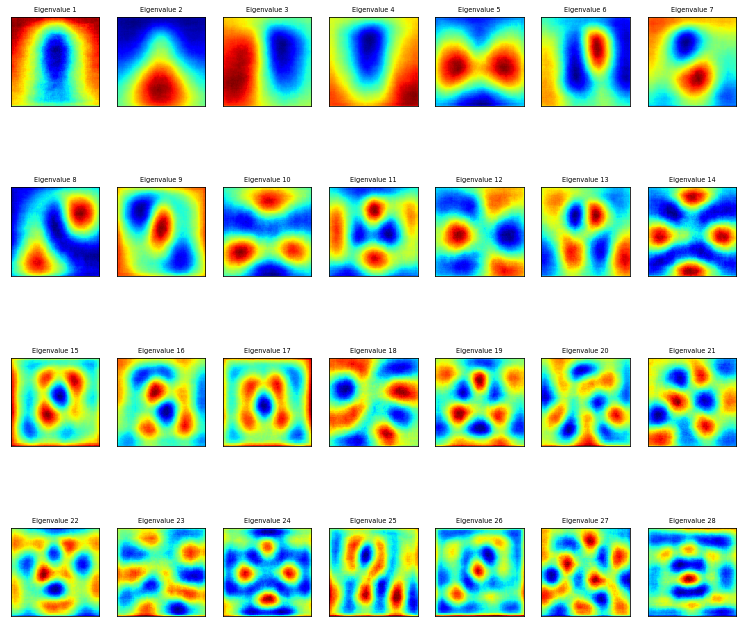

In [75]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
#     for offset in [10, 30,0]:
#     plt.subplot(n_row, n_col, i + 1)
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(128,128), cmap='jet')
    title_text = 'Eigenvector ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()